<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'ศุภลักษณา  บัวจันทร์'
ID = '6230205404'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:20


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,3.773747,6.061187,-9.222883,-8.954075,6.305175,0.292267,7.613113,1.220585,7.528680,-0.619801,7.349913,-2.810641,-3.111243,-1.079978,-2.554639,6.921826,-2.531105,-3.615193,-1.092670,-0.952016,3.812928,-7.987567,4.027819,-2.660919,7.456041,-7.316476,5.960466,-2.767330,-8.676474,5.676556,12.122375,30.382779
1,8.484404,-5.319557,-8.296086,-3.727046,3.417146,-2.354321,-3.198962,-5.068781,9.627884,-1.186137,7.624599,3.679341,-6.719260,9.427014,0.545413,-8.229463,0.397966,-6.307839,3.660300,-3.227168,-6.623447,9.712237,-7.599891,4.959062,2.586674,7.743150,-1.866618,-9.646674,-0.839624,-4.623120,-10.639114,-21.115602
2,-0.885176,-2.064377,-1.735326,7.347219,2.895234,-6.591421,4.689732,-1.831760,5.527787,-2.187902,-4.621077,-2.095996,-6.282829,-6.921801,-3.469243,3.709721,1.311006,8.423316,4.180588,-7.635288,8.171219,-4.399013,-8.206858,-2.485293,2.718617,-3.658901,-3.315503,8.318886,9.889534,4.934751,-4.128754,26.673756
3,0.928953,-3.955223,-7.030693,9.744129,-0.342992,1.773401,-7.167229,4.207292,3.302174,3.398619,5.902347,6.416682,-1.720844,8.569327,-9.563628,5.719072,6.597021,0.552377,3.057767,9.206791,-3.929266,-0.312406,-0.848727,5.037263,-9.414485,-8.538412,-6.457095,8.513097,-3.362707,4.125484,-7.910447,22.627419
4,-5.690987,-3.517787,-2.858825,-7.169143,-5.605544,-9.054258,6.521987,-0.913724,-7.339663,-9.462569,1.945500,-4.143945,1.903859,-0.889551,9.734788,2.465684,-0.186815,10.274393,5.035283,-7.027597,-8.250220,0.108123,6.192776,2.864375,-6.834458,-2.341450,-6.447813,-8.751939,-7.332672,5.696778,-7.035574,30.483889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.631343,-5.922440,-7.594832,-1.042551,3.699737,0.414187,-1.054134,-8.502152,8.658479,4.100714,7.837780,3.280779,-7.556245,7.024185,-1.320418,-9.951174,-0.452707,-5.646853,5.616549,-4.387339,-7.612117,9.434799,-7.439684,5.362935,5.604233,7.636980,-3.764263,-9.298095,-4.074592,-3.094425,-11.844880,-13.472124
9996,-9.164097,3.211174,-1.865883,-9.905384,-3.836890,7.568548,-5.732555,-7.434602,-5.328562,11.115293,2.945332,1.038299,0.860420,7.597590,-0.083376,4.711684,6.783715,8.115086,-7.911840,-3.839552,6.007630,-0.106223,-2.183768,3.416250,2.309178,-3.919674,4.573433,-5.643815,6.567515,-10.614089,6.422348,-51.070443
9997,-4.069899,-2.351560,-0.134604,-5.629799,-5.620890,-9.770339,6.168892,0.835266,-3.912655,-7.703638,1.361204,-3.658080,2.902530,-0.667720,7.789704,2.017346,1.698594,8.220736,4.792831,-8.864895,-8.932504,-0.911860,4.953654,-1.065717,-6.648004,-2.566931,-6.526202,-7.488712,-6.361973,5.717083,-4.703120,30.585414
9998,4.873270,-1.541458,-7.629112,2.557538,8.061374,9.162759,5.372126,1.288333,-8.305103,6.020796,3.953505,0.351103,4.409830,8.857026,-6.120125,-5.882252,-1.019697,-3.206716,-3.188903,4.414865,2.048225,-6.216080,0.629628,-5.189581,-8.773632,3.442669,10.901293,-8.050083,-2.491982,-5.548942,-3.082917,-25.744708


#2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

#clustering

##Visualize

เทคนิคที่ 1 ใช้ขนาดของจุดแสดงปริมาณของ dimension ที่ 3ได้ เพราะมัน plot ได้แค่ 2 dimension

KeyError: ignored

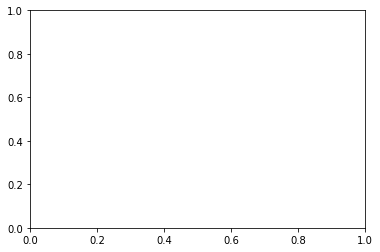

In [22]:
Data.plot.scatter('2','3')